In [58]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [59]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [60]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [61]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [62]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)
# reflect the tables


C:\Users\dylan\AppData\Local\Temp\ipykernel_17192\2372918362.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [63]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [66]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent

('2017-08-23',)

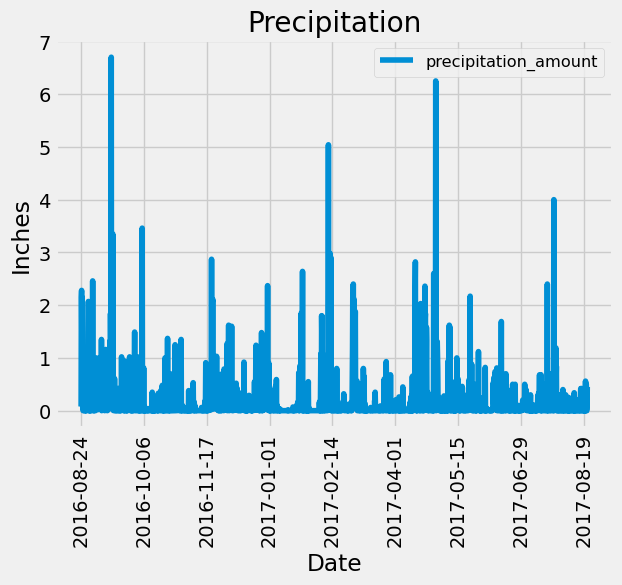

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
precip_data_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data_year, columns = ['measurement_date', 'precipitation_amount'])
precip_df.dropna(axis = 0, how = 'any', inplace = True)


# Sort the dataframe by date
precip_df.sort_values(by = 'measurement_date')
precip_df.set_index('measurement_date', inplace=True)
precip_df.head()


# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot()
precip_plot.set_title("Precipitation")
precip_plot.set_xlabel("Date")
precip_plot.set_ylabel("Inches")
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize='small')

In [70]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = precip_df.describe()
summary_df


,precipitation_amount
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset
stations_number = session.query(Station).count()
print(f"There are {stations_number} stations")

There are 9 stations


In [74]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

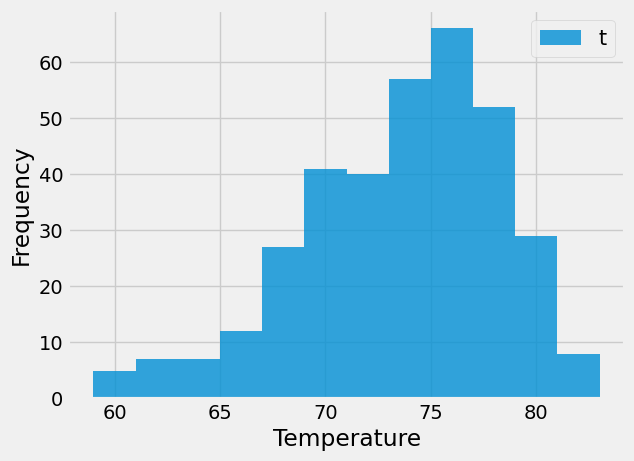

In [97]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_year = session.query(Measurement.date, (Measurement.tobs)).filter(func.strftime(Measurement.date) > year_ago).filter(Measurement.station == 'USC00519281').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
tobs_df = pd.DataFrame(most_active_year)
tobs_df.dropna(axis = 0, how = 'any', inplace = True)


# Sort the dataframe by date
tobs_df.set_index('date', inplace=True)
plt.hist(tobs_df['tobs'], bins = 12, alpha = 0.8)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend('tobs', fontsize = 15, loc = 'upper right')

# Close Session

In [98]:
# Close Session
session.close()